# Working with DataFrames Part3

## GroupBy

Basic imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Create dataframe

In [4]:
# df creation
df = pd.DataFrame({'product':['table','chair','chair','mobile phone','table','mobile phone','table'],
                    'value':[20.45,22.89,32.12,111.22,33.22,100.00,99.99],
                    'category':['furniture','furniture','furniture','electronic','furniture','electronic','furniture']})

In [5]:
# show
df

,category,product,value
0,furniture,table,20.45
1,furniture,chair,22.89
2,furniture,chair,32.12
3,electronic,mobile phone,111.22
4,furniture,table,33.22
5,electronic,mobile phone,100.00
6,furniture,table,99.99


### Let's see how groupby works

Simply put

In [6]:
df.groupby('product')

We **must** use groupby together with other methods: e.g. sum(), mean(), min(), max(), count(), size().

In [22]:
# groupby, count
df.groupby('product').size()

product
chair           2
mobile phone    2
table           3
dtype: int64

In [12]:
# groupby, sum

df.groupby('product').sum()

,value
product,
chair,55.01
mobile phone,211.22
table,153.66


We can use the groupby method and organize a new dataframe

In [13]:
# groupby
df_sum = df.groupby('product').sum()

# reset the index
df_sum.reset_index(inplace=True)

# show
df_sum

,product,value
0,chair,55.01
1,mobile phone,211.22
2,table,153.66


### Plotting the sum
We can plot the dataframe

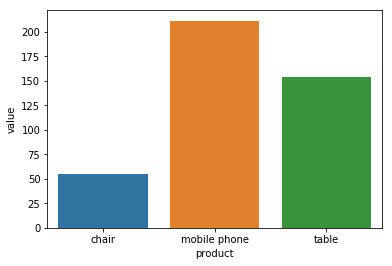

In [14]:
# plot function
sns.barplot(data=df_sum, x='product', y='value')
plt.show()

### Plotting the mean
We can groupby again and plot the mean

In [15]:
# groupby + mean
df_mean = df.groupby('product').mean()

# reset the index (in-place)
df_mean.reset_index(inplace=True)

# sort by values
df_mean

,product,value
0,chair,27.505
1,mobile phone,105.610
2,table,51.220


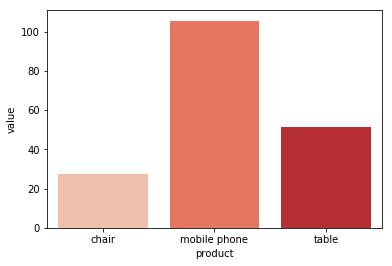

In [20]:
# plot function
sns.barplot(data=df_mean, x='product', y='value', palette='Reds')
plt.show()

### GroupBy multiple columns

Count values

In [16]:
df.groupby(['product','category']).count()

,,value
product,category,
chair,furniture,2
mobile phone,electronic,2
table,furniture,3


Sum values

In [21]:
# groupby
dfsum = df.groupby(['product', 'category']).sum()

# reset index
dfsum.reset_index(inplace=True)

# show df
dfsum

,product,category,value
0,chair,furniture,55.01
1,mobile phone,electronic,211.22
2,table,furniture,153.66


## Aggregations
It's useful to execute multiple aggregations in a single pass using the **df.groupBy.agg()** method.

After grouping we can pass aggregation functions to the grouped object as a dictionary within the agg function.
This dict takes the column that you’re aggregating as a key, and either a single aggregation function or a list of aggregation functions as its value. To apply aggregations to multiple columns, just add additional key:value pairs to the dictionary.

In [21]:
# aggragated method using a list of function
df_agg = df.groupby('product').agg({'value':['min','max','mean']})
df_agg

value                 
                 min     max     mean
product                              
chair          22.89   32.12   27.505
mobile phone  100.00  111.22  105.610
table          20.45   99.99   51.220

Aggragation method using a costumed function.

In [28]:
# Function that find out the the range betwin the values
def max_to_min(arr):
    return arr.max() - arr.min()

In [29]:
# min max difference
df.groupby('product').agg(max_to_min)

,value
product,
chair,9.23
mobile phone,11.22
table,79.54


## Loop over the a dataframe group

In [75]:
# Iterate
for key, group in df.groupby('product'):
    print("The group {} has {} elements".format(k, len(g)))

The group table has 3 elements
The group table has 3 elements
The group table has 3 elements


### Create a dictionary of the products

**Steps:** groupby --> list --> dictionary

In [79]:
# Creating a dictionary of the data pieces 
group_dict = dict(list(df.groupby('product')))

#Show the group of table
group_dict['table']

,product,value
0,table,20.45
4,table,33.22
6,table,99.99


## Nice! Let's do some exercise!